In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np

In [2]:
# CSVデータのロード、ヘッダなし
data = np.array( pd.read_csv("data_quiz_18.csv", header=None)  )
X    = data[:, 0:2]
y    = data[:,-1]

In [3]:
print( "type(data) = ", type(data))
print( "data.shape = ", data.shape)

type(data) =  <class 'numpy.ndarray'>
data.shape =  (96, 3)


Text(0.5, 0, 'X[:,2]')

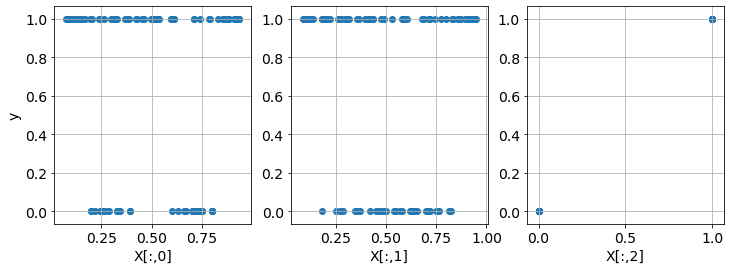

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['font.size']      = 14
plt.figure();
#
plt.subplot(1,3,1)
plt.scatter( data[:,0], data[:,-1] );
plt.ylabel('y')
plt.grid(); plt.xlabel('X[:,0]')
#
plt.subplot(1,3,2)
plt.scatter( data[:,1], data[:,-1] );
plt.grid(); plt.xlabel('X[:,1]')
#
plt.subplot(1,3,3)
plt.scatter( data[:,2], data[:,-1] );
plt.grid(); plt.xlabel('X[:,2]')

In [10]:
# モデルの作成
model = DecisionTreeClassifier()

# モデルの最適化
model.fit(X,y)

# 予測
y_pred = model.predict(X)

# 正解率
acc = accuracy_score(y, y_pred)
print("acc = ", acc)

acc =  1.0


Text(0.5, 0, 'X[:,2]')

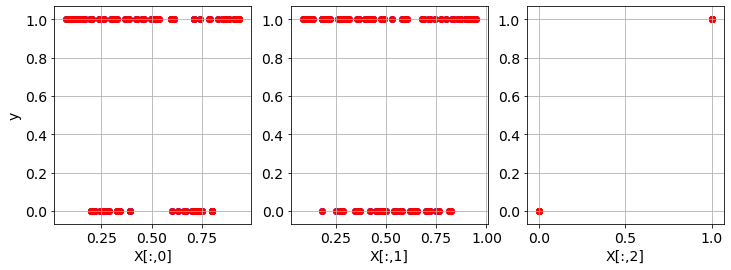

In [20]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['font.size']      = 14
plt.figure();
#
plt.subplot(1,3,1)
plt.scatter( data[:,0], data[:,-1] ,c='blue');
plt.scatter( data[:,0], y_pred ,c='red');
plt.ylabel('y')
plt.grid(); plt.xlabel('X[:,0]')
#
plt.subplot(1,3,2)
plt.scatter( data[:,1], data[:,-1] ,c='blue');
plt.scatter( data[:,1], y_pred ,c='red');
plt.grid(); plt.xlabel('X[:,1]')
#
plt.subplot(1,3,3)
plt.scatter( data[:,2], data[:,-1] ,c='blue');
plt.scatter( data[:,2], y_pred ,c='red');
plt.grid(); plt.xlabel('X[:,2]')

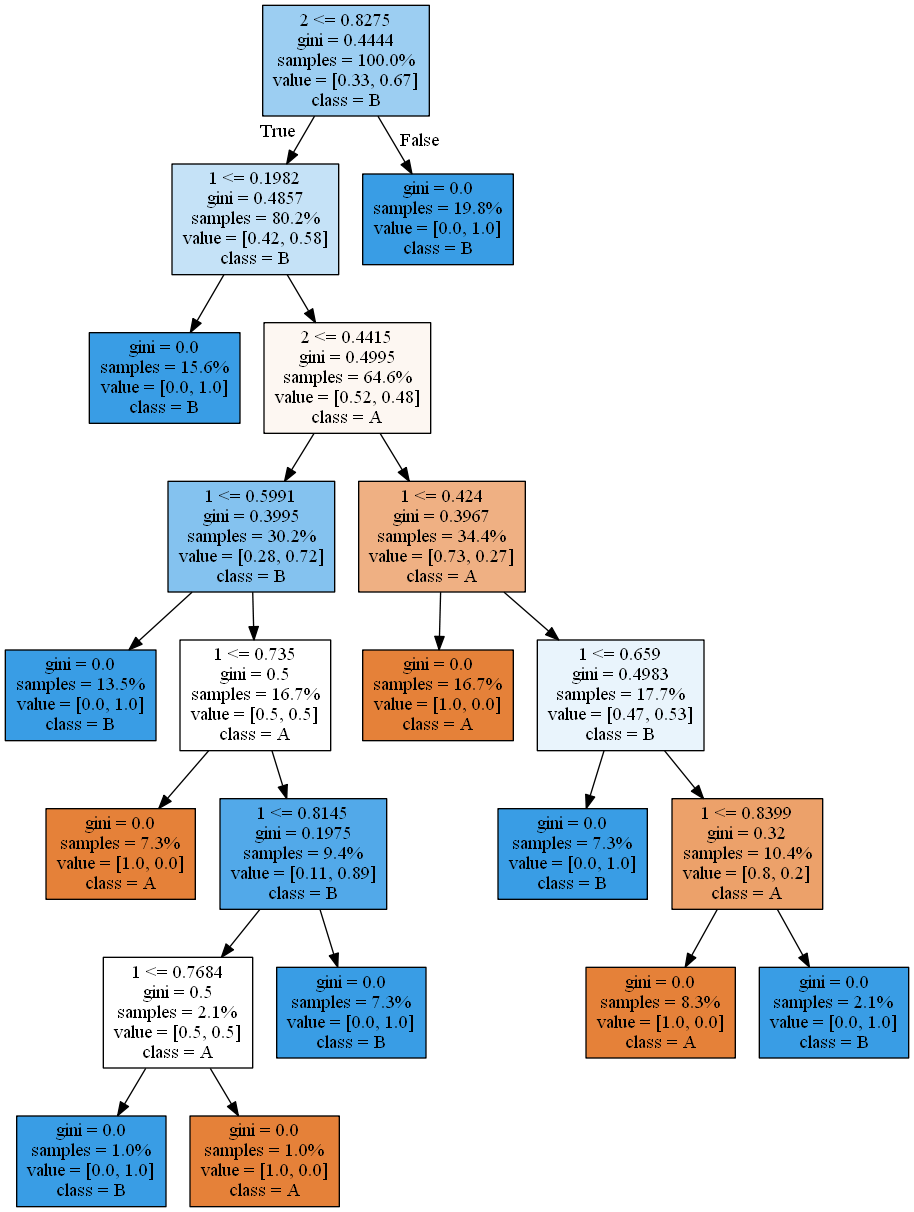

In [9]:
# graphvizによる決定木可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph

dot_data = tree.export_graphviz(
    model,
    out_file="MyTest.dot",
    feature_names = [1,2,3],
    class_names   = ['A','B','C'],
    filled=True,
    proportion=True)

# graph = pydotplus.graph_from_dot_data(dot_data)   # エラー
graph = pydotplus.graph_from_dot_file("MyTest.dot") # 一度ファイルを出力すると上手く行く

# dot.exeへのパスをdictで渡す
graph.progs = {'dot': u"D:\\app\graphviz-2.38\\release\\bin\\dot.exe"}

Image(graph.create_png())

In [6]:
#　エラー
# # # # Treeの描画
# from sklearn.tree import export_graphviz
# import subprocess

# export_graphviz(model, "tree1_1.dot")
# subprocess.run("dot -Tpng tree1_1.dot -o tree1_1.png".split())

In [7]:
#　エラー
# from dtreeviz.trees import dtreeviz

# viz = dtreeviz(
#     model,
#     X,
#     y,
#     target_name='variety',
#     feature_names=["1","2","3"],
#     class_names=["A","B","C"]
# ) 

# viz.view()